In [5]:
# get excel file
import numpy as np
import pandas as pd
adress='C:\\Users\\FARZAN\\Desktop\\DM\\Dm.xlsx'
data= pd.read_excel(adress)
data_test=pd.read_excel('C:\\Users\\FARZAN\\Desktop\\DM\\Dm.xlsx',sheetname='Test')
data.head()


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F1550,F1551,F1552,F1553,F1554,F1555,F1556,F1557,F1558,Class
0,125,125,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,yes


In [6]:
feature= ['Customer_Income', 'First_Buy_Data', 'Last_Buy_Data', 'Average_Buy_Amount', 'Frequency_Level', 'Buy_Amount_Grade_new', 'Special_Buyer_new', 'Last_Buy_Amount', 'Buy_Amount_Average']
x =data[feature]
y= data.Class
X=np.array(x)
y=np.array(y)

KeyError: "['Customer_Income' 'First_Buy_Data' 'Last_Buy_Data' 'Average_Buy_Amount'\n 'Frequency_Level' 'Buy_Amount_Grade_new' 'Special_Buyer_new'\n 'Last_Buy_Amount' 'Buy_Amount_Average'] not in index"

# naive bayes

### accuracy with 4 feature is more than 5 feature so we choose 4 feature
accuracy with 4 feature = 94% and accuracy with 5 feature = 93%

In [1]:
#use kfold

from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

kf=KFold(n_splits=5)
l=[]
u=[]
fold=0
for train_index,test_index in kf.split(X):
    fold +=1
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    u.append([X_train,X_test,y_train,y_test])
    model_nb = GaussianNB().fit(X_train, y_train)
    score =model_nb.score(X_test,y_test)
    l.append(score)
    print("score for fold %d  : %f" % (fold,score))

print("naive_bayes accuracy_score ", sum(i for i in l)/5)


NameError: name 'X' is not defined

In [4]:
#training the model with maximum accuracy
X_train,X_test,y_train,y_test=u[l.index(max(l))][0],u[l.index(max(l))][1],u[l.index(max(l))][2],u[l.index(max(l))][3]


model_nb = GaussianNB()
model_nb.fit(X_train,y_train)
preds =model_nb.predict(X_test)

#confusion_matrix  & classification_report
from sklearn.metrics import classification_report, confusion_matrix  
print("confusion_matrix \n",confusion_matrix(y_test, preds))  
print("\nclassification_report \n",classification_report(y_test, preds))

#RMSE
s=np.sum(np.array(y_test-preds)**2)
RMSE=(s/len(y_test))**(1/2)
print("\nRMSE for bayesian algorithm is:\t",RMSE)

confusion_matrix 
 [[16598   488]
 [  855    54]]

classification_report 
              precision    recall  f1-score   support

          0       0.95      0.97      0.96     17086
          1       0.10      0.06      0.07       909

avg / total       0.91      0.93      0.92     17995


RMSE for bayesian algorithm is:	 0.273188290705


auc is: 0.609339384132


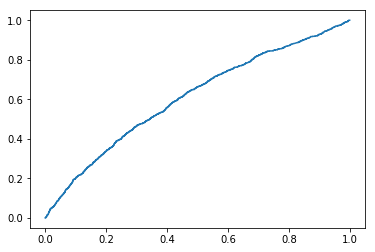

C:\Users\FARZAN\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


roc_auc :  0.606201454068


In [5]:
#ROC
y_pred_prob_nb = model_nb.predict_proba(X_test)[:, 1]
from sklearn import metrics
from matplotlib import pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_nb)
#plt.plot(fpr, tpr)
#plt.xlim([0.0, 1.0])
#plt.ylim([0.0, 1.0])
#plt.title('ROC curve for diabetes classifier')
#plt.xlabel('False Positive Rate (1 - Specificity)')
#plt.ylabel('True Positive Rate (Sensitivity)')
#plt.grid(True)
print('auc is:', metrics.auc(fpr,tpr))
plt.plot(fpr,tpr)
plt.show()
# onother way to calculate the auc
from sklearn.cross_validation import cross_val_score
print("roc_auc : ",cross_val_score(model_nb, x, y, cv=10, scoring='roc_auc').mean())

# decision trees


In [7]:

from sklearn.tree import DecisionTreeClassifier


kf=KFold(n_splits=5)
l=[]
u=[]
fold=0
for train_index,test_index in kf.split(X):
    fold +=1
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    u.append([X_train,X_test,y_train,y_test])
    model_dct =DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=3,class_weight="balanced") .fit(X_train, y_train)
    score =model_dct.score(X_test,y_test)
    l.append(score)
    print("score for fold %d  : %f" % (fold,score))

print("naive_bayes accuracy_score ", sum(i for i in l)/5)



#training the model with maximum accuracy
X_train,X_test,y_train,y_test=u[l.index(max(l))][0],u[l.index(max(l))][1],u[l.index(max(l))][2],u[l.index(max(l))][3]


model_dct =DecisionTreeClassifier(criterion = "gini", random_state = 100,max_depth=3) 
model_dct.fit(X_train, y_train)

y_pred_dct = model_dct.predict(X_test)

#percent of accuracy
from sklearn.metrics import accuracy_score
print("\nAccuracy is ", accuracy_score(y_test,y_pred_dct)*100)

#confusion_matrix  & classification_report

from sklearn.metrics import classification_report, confusion_matrix  
print("confusion_matrix : \n",confusion_matrix(y_test, y_pred_dct))  
print("\nclassification_report\n",classification_report(y_test, y_pred_dct))  

s=np.sum(np.array(y_test-y_pred_dct)**2)
RMSE=(s/len(y_test))**(1/2)
print("\nRMSE for bayesian algorithm is:\t",RMSE)


score for fold 1  : 0.949486
score for fold 2  : 0.947708
score for fold 3  : 0.949931
score for fold 4  : 0.947260
score for fold 5  : 0.950483
naive_bayes accuracy_score  0.948973578702

Accuracy is  95.0483494498
confusion_matrix : 
 [[17100     2]
 [  889     3]]

classification_report
              precision    recall  f1-score   support

          0       0.95      1.00      0.97     17102
          1       0.60      0.00      0.01       892

avg / total       0.93      0.95      0.93     17994


RMSE for bayesian algorithm is:	 0.222523044878


auc is: 0.594252212916


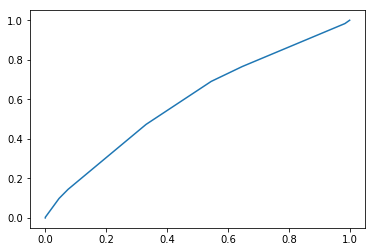

In [8]:
y_pred_prob_dct= model_dct.predict_proba(X_test)[:, 1]
from sklearn import metrics
from matplotlib import pyplot as plt
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_dct)# logestic regression

print('auc is:', metrics.auc(fpr,tpr))
plt.plot(fpr,tpr)
plt.show()

# logestic regression


In [9]:
from sklearn.linear_model import LogisticRegression

kf=KFold(n_splits=5)
l=[]
u=[]
fold=0
for train_index,test_index in kf.split(X):
    fold +=1
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    u.append([X_train,X_test,y_train,y_test])
    model_logreg = LogisticRegression().fit(X_train, y_train)
    score =model_logreg.score(X_test,y_test)
    l.append(score)
    print("score for fold %d  : %f" % (fold,score))

print("naive_bayes accuracy_score ", sum(i for i in l)/5)



#training the model with maximum accuracy
X_train,X_test,y_train,y_test=u[l.index(max(l))][0],u[l.index(max(l))][1],u[l.index(max(l))][2],u[l.index(max(l))][3]

# instantiate model
model_logreg = LogisticRegression(class_weight="balanced")

# fit model
model_logreg.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = model_logreg.predict(X_test)


# calculate accuracy
from sklearn import metrics
print(" accuracy : ",metrics.accuracy_score(y_test, y_pred_class))

y_pred_prob = model_logreg.predict_proba(X_test)[:, 1]


score for fold 1  : 0.949486
score for fold 2  : 0.947763
score for fold 3  : 0.949931
score for fold 4  : 0.947205
score for fold 5  : 0.950428
naive_bayes accuracy_score  0.948962463268
 accuracy :  0.950427920418


y_pred_prob : 	 [ 0.05712559  0.04504646  0.04566287  0.04481168  0.06686594  0.0369264
  0.0379      0.04448559  0.03380934  0.0424436 ]

y_pred_class : 	 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]

confusion_matrix
 [[17102     0]
 [  892     0]]

classification_report
              precision    recall  f1-score   support

          0       0.95      1.00      0.97     17102
          1       0.00      0.00      0.00       892

avg / total       0.90      0.95      0.93     17994


RMSE for logestic regression algorithm is:	 0.222647882501


C:\Users\FARZAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


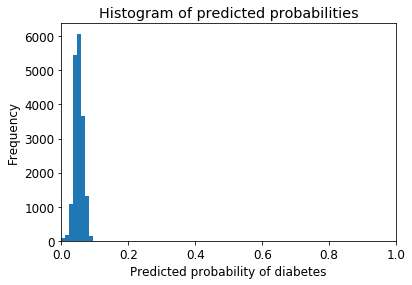

In [10]:
 #allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt

# adjust the font size 
plt.rcParams['font.size'] = 12
# histogram of predicted probabilities

# 8 bins
plt.hist(y_pred_prob, bins=8)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of diabetes')
plt.ylabel('Frequency')

# predict diabetes if the predicted probability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_pred_class = binarize([y_pred_prob], 0.7)[0]


# print the first 10 predicted probabilities
print("y_pred_prob : \t",y_pred_prob[0:10])
print("\ny_pred_class : \t",y_pred_class[0:10])
from sklearn.metrics import classification_report, confusion_matrix  
print("\nconfusion_matrix\n",confusion_matrix(y_test, y_pred_class))  
print("\nclassification_report\n",classification_report(y_test,y_pred_class)) 

s=np.sum(np.array(y_test-y_pred_class)**2)
RMSE=(s/len(y_test))**(1/2)
print("\nRMSE for logestic regression algorithm is:\t",RMSE)

auc is:	 0.582725652154

roc_auc : 	  0.587785172628


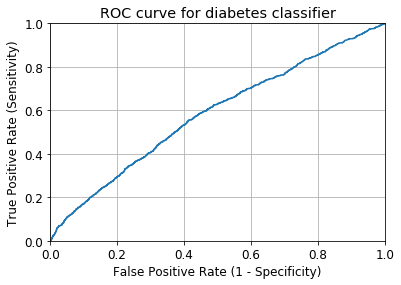

In [11]:
#ROC 

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for  classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')# nuralnetwork
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
print('auc is:\t', metrics.auc(fpr,tpr))

from sklearn.cross_validation import cross_val_score
print("\nroc_auc : \t ",cross_val_score(model_logreg, x, y, cv=10, scoring='roc_auc').mean())

# nuralnetwork

In [12]:
from sklearn.neural_network import MLPClassifier
#choose 3 layers with the same number of neurons
#model_nn = MLPClassifier(hidden_layer_sizes=(30,30,30))

kf=KFold(n_splits=5)
l=[]
u=[]
fold=0
for train_index,test_index in kf.split(X):
    fold +=1
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    u.append([X_train,X_test,y_train,y_test])
    model_nn = MLPClassifier(hidden_layer_sizes=(30,30,30),class_weight="balanced").fit(X_train, y_train)
    score =model_nn.score(X_test,y_test)
    l.append(score)
    print("score for fold %d  : %f" % (fold,score))

print("naive_bayes accuracy_score ", sum(i for i in l)/5)



#training the model with maximum accuracy
X_train,X_test,y_train,y_test=u[l.index(max(l))][0],u[l.index(max(l))][1],u[l.index(max(l))][2],u[l.index(max(l))][3]

# instantiate model
model_nn = MLPClassifier(hidden_layer_sizes=(30,30,30))

# fit model
model_nn.fit(X_train, y_train)

predictions = model_nn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix  
print("confusion_matrix :\n",confusion_matrix(y_test,predictions))  
print("\nclassification_report:\n ",classification_report(y_test,predictions))  

s=np.sum(np.array(y_test-predictions)**2)
RMSE=(s/len(y_test))**(1/2)
print("\nRMSE for neural network algorithm is:\t",RMSE)

score for fold 1  : 0.949486
score for fold 2  : 0.947541
score for fold 3  : 0.949931
score for fold 4  : 0.914471
score for fold 5  : 0.950372
naive_bayes accuracy_score  0.942360265005
confusion_matrix :
 [[17102     0]
 [  892     0]]

classification_report:
               precision    recall  f1-score   support

          0       0.95      1.00      0.97     17102
          1       0.00      0.00      0.00       892

avg / total       0.90      0.95      0.93     17994


RMSE for neural network algorithm is:	 0.222647882501


C:\Users\FARZAN\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


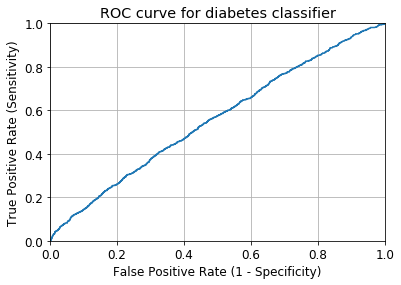

In [14]:
# ROC curve

y_prediction_prob = model_nn.predict_proba(X_test)[:, 1]

# predict diabetes if the predicted # svm algorithemprobability is greater than 0.3
from sklearn.preprocessing import binarize
# it will return 1 for all values above 0.3 and 0 otherwise
# results are 2D so we slice out the first column
y_predictions_prob = binarize([y_prediction_prob],0.7)[0]

fpr, tpr, thresholds = metrics.roc_curve(y_test,y_prediction_prob )

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)


# svm algorithem

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(kernel='linear',probability=True)


kf=KFold(n_splits=5)
l=[]
u=[]
fold=0
for train_index,test_index in kf.split(X):
    fold +=1
    X_train,X_test=X[train_index],X[test_index]
    y_train,y_test=y[train_index],y[test_index]
    u.append([X_train,X_test,y_train,y_test])
    model_svm=SVC(kernel='linear',probability=True,class_weight="balanced").fit(X_train, y_train)
    score =model_svm.score(X_test,y_test)
    l.append(score)
    


In [ ]:
model_svm.fit(X_train,y_train)


##
preds_svm = model_svm.predict(X_test)
print(preds_svm)

##

from sklearn.metrics import accuracy_score
print("accuracy_score :\t",accuracy_score(y_test, preds_svm))

print("\nconfusion_matrix : \n",confusion_matrix(y_test, preds_svm))  
print("\nclassification_report:\n",classification_report(y_test, preds_svm))  

s=np.sum(np.array(y_test-preds_svm)**2)
RMSE=(s/len(y_test))**(1/2)
print("\nRMSE for SVM algorithm is:\t",RMSE)


In [ ]:
# roc

y_pred_prob_svm = model_svm.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob_svm)
print('auc is:', metrics.auc(fpr,tpr))
plt.plot(fpr,tpr)
plt.show()
from sklearn.cross_validation import cross_val_score
print("roc_auc: ",cross_val_score(model_svm, x, y, cv=10, scoring='roc_auc').mean())

In [21]:
x_t = data_test[feature]

In [61]:
y_nb = model_nb.predict(x_t)
#y_svm = model_svm.predict(x_t)
y_dct = model_dct.predict(x_t)
y_logreg = model_logreg.predict(x_t)
y_nn = model_nn.predict(x_t)

In [66]:
predictions = np.array([y_nb,  y_dct, y_logreg, y_nn])
co=['naivebayes', 'decisiontree', 'logesticregression', 'neuralnetwork']
result = pd.DataFrame(predictions.T, columns=co)
result

,naivebayes,decisiontree,logesticregression,neuralnetwork
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [ ]:
path="C:\\Users\\FARZAN\\Desktop\\DM\\P1result.csv"
f=open(path,'w+')
f.write(str("naive bayes"+","+"y_svm"+","+"decision tree"+","+"logestic regression"+","+"neural network"))
f.write("\n")
for i in range(len (result)):
    f.write(str(result.iloc[i][0])+","+str(result.iloc[i][1])+","+str(result.iloc[i][2])+
            ","+str(result.iloc[i][3])+","+str(result.iloc[i][4]))
    f.write("\n")
f.close()
